In [72]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
# Opening the CSV files
test = pd.read_csv('test_data.csv', encoding='cp1252')
training = pd.read_csv('training_data.csv', encoding='cp1252')

In [74]:
# Checking the column names
training.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [75]:
# Dataset Head
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [76]:
# Dataset Info
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [77]:
# Dataset Description
training.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


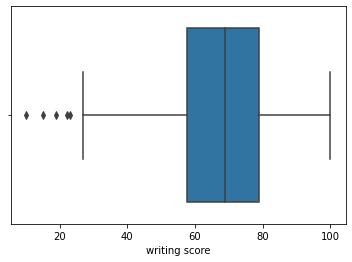

In [78]:
# Checking for outliers
ax1 = sns.boxplot(x=training['writing score'])

In [79]:
# Removing the outliers
training = training.loc[training['writing score']>=25]

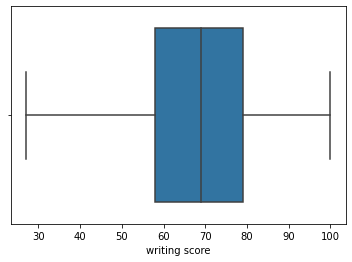

In [80]:
# Checking if there is outliers
ax1 = sns.boxplot(x=training['writing score'])

In [81]:
# Checking gender qualitative qualifiers
training['gender'].unique()

array(['female', 'male'], dtype=object)

In [82]:
# Checking race/ethnicity qualitative qualifiers
training['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [83]:
# Checking parental level of education qualitative qualifiers
training['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [84]:
# Checking lunch qualitative qualifiers
training['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [85]:
# Checking test preparation course qualitative qualifiers
training['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [86]:
# Changing qualitative qualifiers to quantitative qualifiers
training_gender_qt = {'male': 1, 'female': 2}
training_race_qt = {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}
training_parentalEducation_qt = {'some high school': 1, 'some college': 2, 'high school': 3, "associate's degree": 4, "master's degree": 5, "bachelor's degree": 6}
training_lunch_qt = {'free/reduced': 1, 'standard' : 2}
training_testPreparation_qt = {'none': 1, 'completed': 2}

training.replace(training_gender_qt, inplace = True)
training.replace(training_race_qt, inplace = True)
training.replace(training_parentalEducation_qt, inplace = True)
training.replace(training_lunch_qt, inplace = True)
training.replace(training_testPreparation_qt, inplace = True)

test.replace(training_gender_qt, inplace = True)
test.replace(training_race_qt, inplace = True)
test.replace(training_parentalEducation_qt, inplace = True)
test.replace(training_lunch_qt, inplace = True)
test.replace(training_testPreparation_qt, inplace = True)

In [87]:
# Checking if there is any missing values
training.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [88]:
# Though there isn't any missing values, we'll use this code lines for check reasons
print(training.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


<AxesSubplot:>

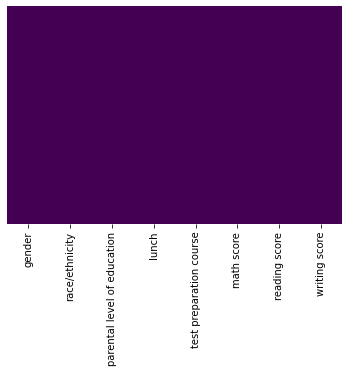

In [89]:
# Checking our dataset heatmap
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

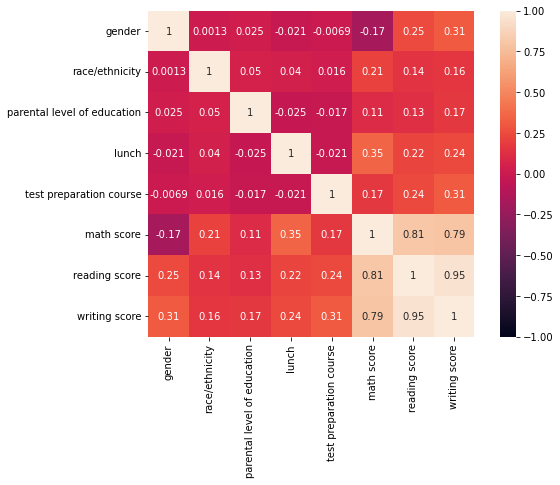

In [90]:
# Checking the correlation matrix
corr_matrix = training.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [91]:
# Visualize how the dataset is at this moment 
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,2,6,2,1,72,72,74
1,2,3,2,2,2,69,90,88
2,2,2,5,2,1,90,95,93
3,1,1,4,1,1,47,57,44
4,1,3,2,2,1,76,78,75


In [92]:
# Starting to prepare the predicitons
X = training.drop(['writing score'], axis=1)
y = training['writing score']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

<AxesSubplot:xlabel='writing score', ylabel='count'>

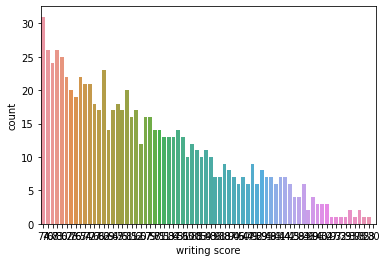

In [94]:
# Checking the values in y_train
sns.countplot(x = y_train, order = training['writing score'].value_counts().index)

<AxesSubplot:xlabel='writing score', ylabel='count'>

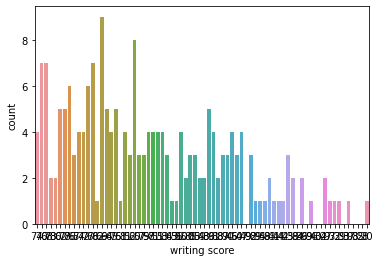

In [95]:
# Checking if the values on y_test look like the ones in y_train
sns.countplot(x = y_test, order = training['writing score'].value_counts().index)

In [96]:
# Using the Decision Tree Classifier Regression Method
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

predictions = treemodel.predict(X_test)
predictions

array([52, 38, 45, 72, 48, 47, 63, 91, 90, 74, 79, 52, 68, 60, 73, 67, 57,
       70, 73, 93, 79, 67, 81, 73, 63, 73, 75, 57, 80, 41, 94, 78, 84, 64,
       75, 87, 62, 57, 94, 62, 70, 35, 82, 49, 65, 67, 59, 82, 54, 54, 91,
       72, 80, 58, 66, 65, 82, 84, 70, 88, 50, 70, 45, 60, 77, 86, 57, 57,
       75, 36, 70, 49, 80, 66, 75, 58, 85, 52, 76, 67, 68, 86, 69, 78, 87,
       79, 61, 61, 61, 68, 80, 66, 50, 88, 77, 43, 89, 93, 64, 43, 48, 94,
       71, 43, 56, 37, 74, 63, 60, 80, 74, 88, 73, 76, 82, 67, 81, 72, 73,
       73, 41, 59, 33, 54, 87, 87, 28, 44, 55, 62, 78, 52, 60, 61, 69, 52,
       77, 72, 74, 60, 86, 60, 68, 73, 61, 66, 92, 70, 61, 69, 54, 43, 39,
       75, 78, 32, 56, 80, 84, 89, 64, 82, 87, 68, 71, 61, 86, 71, 53, 86,
       70, 80, 45, 58, 82, 95, 54, 88, 58, 89, 41, 66, 72, 70, 65, 37, 95,
       57, 41, 92, 49, 72, 85, 43, 99, 73, 71, 70, 73])

/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          28       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         3
          47       0.00      0.00      0.00         4
          48       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         3
          52       0.00      0.00      0.00         3
          53       1.00    

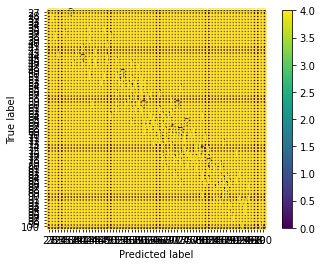

In [99]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Priting the results
print(classification_report(y_test,predictions,labels=np.unique(predictions)))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

# Printing the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=treemodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=treemodel.classes_)
disp.plot()

In [100]:
set(y_test) - set(predictions)

{27, 30, 42, 46, 51, 83, 96, 97, 100}